# Why do we need to create classes?

Šiame skyriuje pabandysime atlikti tam tikrą užduotį ir ją darydami turėtume pastebėti, kad kodas apsirašo daug paprasčiau naudojant klasę.

Tarkime, kad jūs gavote nelengvą užduotį: išanalizuoti, kaip sekėsi laikyti informatikos egzaminą kiekvienai mokyklai. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def random_school(N):
    # Grąžina normalųjį rezultatų pasiskirstymą Lietuvos mastu su dviem pikais:
    # didesniu intervale [35, 40) ir mažesniu intervale [80, 90)
    mu1, sigma1 = np.random.randint(35, 40), 15
    mu2, sigma2 = np.random.randint(80, 90), 10
    f1, f2 = np.random.normal(mu1, sigma1, size=int(N*0.8)).tolist(), np.random.normal(mu2, sigma2, size=int(N*0.2)).tolist()
    arr = np.array(f1 + f2)
    return arr[(arr>=0) & (arr<101)].astype(int)
   
def plot_sample(N):
    # Atvaizduoja random_school(N) outputą
    arr = random_school(N)
    counts, labels = np.histogram(arr, bins=np.arange(0, 101))
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.hist(arr, bins=labels, fc='g', ec='k')
    ax.set_xlabel('Surinkti balai', fontsize=20)
    ax.set_ylabel('Kiek abiturientų surinko', fontsize=20)
    plt.show()
    return np.sort(arr)

Pavyzdys, kaip atrodo moksleivių rezultatų pasiskirstymas  Lietuvoje:

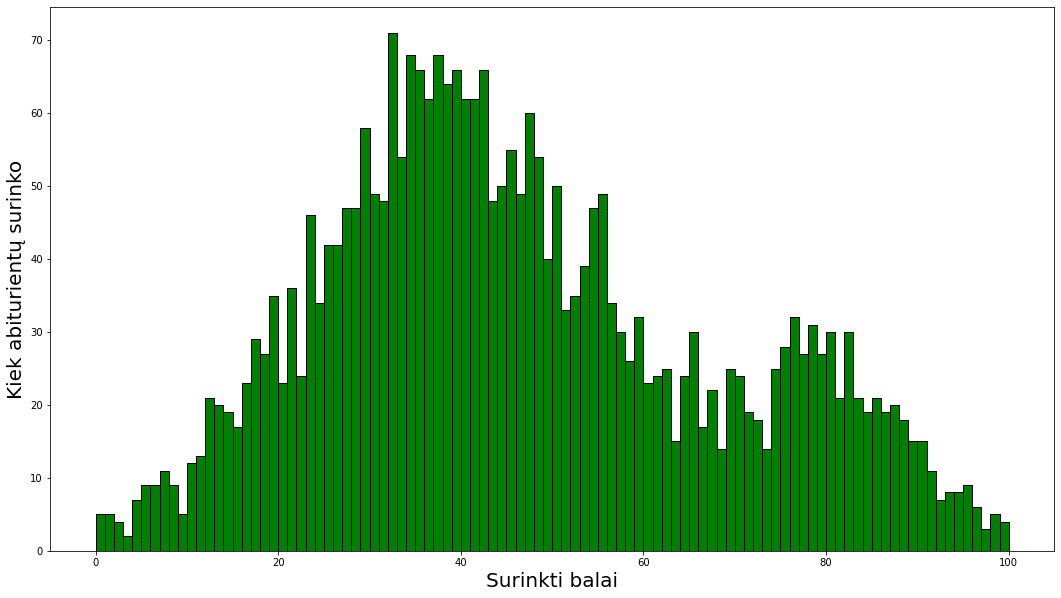

In [12]:
arr = plot_sample(3000)

Pavyzdys, kaip atrodo analizė Lietuvos mastu:

In [13]:
def rask_kiek_neišlaikė(arr):
    print(f'Egzamino neišlaikė {np.round(100 * np.sum(arr<20)/len(arr), 1)}% dalyvių')

def rask_pirmus_25(arr):
    idx = (len(arr)-1)//4
    print(f'Pirmieji 25% moksleivių surinko ne daugiau, nei {arr[idx]}tšk.')
    
def rask_pirmus_50(arr):
    idx = (2*len(arr)-1)//4
    print(f'Pirmieji 50% moksleivių surinko ne daugiau, nei {arr[idx]}tšk.')
  
def rask_pirmus_75(arr):
    idx = (3*len(arr)-1)//4
    print(f'Pirmieji 75% moksleivių surinko ne daugiau, nei {arr[idx]}tšk.')
    
def rask_visus(arr):
    print(f'Didžiausias gautas moksleivio įvertinimas - {arr[-1]}tšk.')
    
def total(arr):
    print(f'Iš viso informatiką laikė {len(arr)} abiturientų')
   
rask_kiek_neišlaikė(arr)
rask_pirmus_25(arr) 
rask_pirmus_50(arr)
rask_pirmus_75(arr)
rask_visus(arr)
total(arr)

Egzamino neišlaikė 9.5% dalyvių
Pirmieji 25% moksleivių surinko ne daugiau, nei 31tšk.
Pirmieji 50% moksleivių surinko ne daugiau, nei 42tšk.
Pirmieji 75% moksleivių surinko ne daugiau, nei 60tšk.
Didžiausias gautas moksleivio įvertinimas - 100tšk.
Iš viso informatiką laikė 2972 abiturientų


[Tikroviškos analizės pavyzdys](https://www.nec.lt/failai/8760_2020_IT_st_ana-red.pdf)

`arr` - tai abiturientų duomenys iš 100 mokyklų, saugomi serveryje ir sunumeruotų `id` nuo 0 iki 99. Įtrauktos tik mokyklos, turinčios tarp 10 ir 29 dalyvavusių egzamine. Pirmame stulpelyje yra pateikiamas mokyklos `id`, surašyti didėjimo tvarka, antrame - mokinių rezultatai iš atitinkamų mokyklų rezultatai bet kuria tvarka. Masyvą `arr` galima gauti paleidus šį kodą:

In [4]:
results = [random_school(N) for N in np.random.randint(10, 30, size=100)]
lens = [len(n) for n in results]
codes = np.repeat(np.arange(len(lens)), lens)
results = np.concatenate(results)
arr = np.transpose([codes, results])
arr

array([[ 0, 35],
       [ 0, 47],
       [ 0, 40],
       ...,
       [99, 89],
       [99, 71],
       [99, 87]])

**Jūsų tikslas - remiantis `arr` duomenimis sukurti tokį patį skaičiavimo mechanizmą individualiai kiekvienai iš mokyklų su didesniu kiekiu laikiusių mokinių. Kiekvienos mokyklos direktorius, norėdamas sužinoti, kaip sekėsi jo mokyklos moksleiviams, gali įvesti mokyklos kodą `id` ir pasirinkti vieną iš šešių galimų užklausų:**

* rask_kiek_neišlaikė(arr, id)
* rask_pirmus_25(arr, id)
* rask_pirmus_50(arr, id)
* rask_pirmus_75(arr, id)
* rask_visus(arr, id)
* total(arr, id)

## Užduotį sudaro kelios dalys

* Pirmoje dalyje bandysime pasiekti tikslą - parašyti kodą, kuris duoda rezultatą, kurio tikimės
* Antroje dalyje bandysime refactorinti kodą - kitaip perdėlioti funkcijų aprašymus
* Trečioje dalyje bandysime parašyti tą patį kodą naudojant klasę
* Jei liks noro parašysime dokumentaciją ir testinius atvejus

Užduotį įmanoma atlikti naudojant vien tam tikrų metodų apibrėžimus (`def`). Norint kode panaudoti klasės aprašą, reikėtų susipažinti su objektiškai orientuoto programavimo (OOP) [pagrindais](../../turinys.ipynb) (žr. OOP skyrių 2022 metų medžiagoje).